# Random Forest - Regression

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

## Plus: An Additional Analysis of Various Regression Methods

The motive behind using different regression methods is to understand how some algorithms fit properly to the data snd some do not.

Essentially to show that some algorithms are not suited for certain types of data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

In [6]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


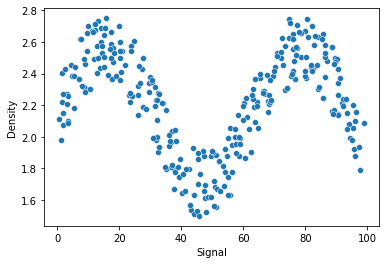

In [7]:
sns.scatterplot(data=df, x='Signal', y='Density');

We get a sin curve type of relationship b/w signal and density

In [8]:
#Checking null data
df.isnull().sum()

Signal     0
Density    0
dtype: int64

In [9]:
# Splitting the data

In [10]:
X = df['Signal']
X.shape

(300,)

In [11]:
#X.values.reshape(-1,1)

In [12]:
y = df['Density']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=101)

# 1. Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[80.5981225  67.78341542 85.8228364  56.25233588 37.61630939 57.38480424
  9.09423354 41.65219047 34.02717884 72.24767039 74.80129638 26.45387499
 67.94457433 20.36768436 78.48400593 25.99751685 74.94321595 47.46075748
 20.11793737 53.29269434 11.69927445 70.97721648 80.03936215 84.27712335
 68.94205562 68.62225319 59.00795312 45.34247827 51.14752453 93.39407915
 23.21207789 50.51324968 12.96409209 64.42480217 76.03302052 29.69675086
 90.52204588 95.89619979  3.08215991 95.30880515 37.89415205 30.72578622
  4.56076991 40.29631043 67.88305288 77.00233064 24.81782725 87.11476768
 32.01631598 73.49644582 39.31276208 16.86506885 51.19161607 66.36433682
 88.68478065 93.23308753 76.96470453 90.60395407 95.27151287 74.02752794
 82.66759709 14.2298772  96.03374987  1.72374603 60.48230007 58.40357879
 27.37182279 23.60586143 38.02026671 79.89441471 58.58658474 59.08108028
 12.86206682 66.78076834 38.98023451 64.6310259  92.01423084 86.20473574
 14.29944632  3.35051291 96.45604613  7.7766011  90.52368519 80.96419275
 50.13561046 68.39444203 36.03278833 26.72669742 35.03032146 31.46943771
 30.5266834  63.47748521 27.7304178  32.01392539 68.86917639 73.98379174
  1.66229161 31.92883259 66.30771565 12.10943741 14.13635308 45.39774078
 13.10077104 64.414242   70.93875541 61.24167373 36.59733361 20.93925534
 83.79384878 97.41450249 89.47419728 86.44270393 65.42721043 75.40825815
 86.48464761  5.28696069 55.77279339  7.38281731 98.83165801 49.51161092
 20.50738837 15.03423504 84.11486701 92.03483153 91.91113113 76.03594544
 36.38317641 37.01061856 85.68535822 45.00299917 34.70658388 11.27527053
 77.96721751 47.4528517  17.46542057 72.3097468  19.04624317 45.26698419
 80.24809189 55.62798331 14.32644528 15.33531149 53.87251779 61.79687929
 58.60894578 66.88225606 35.05157441 90.06868695  8.67106119  3.04669059
 50.69252146 32.65994668 15.86447948 45.08091095 45.65718338 75.99067699
 63.60755651 42.39908148 88.61999862  3.37105341 76.28863509 89.27847838
 17.49779896 28.68425077 74.82465287  8.51031072 44.20040777 17.32519267
 82.61598742 48.74850972 15.22979909 17.96684624 11.56703431 41.10858539
 47.72208331 88.47652143  8.79312744 76.01338867 60.78797419 40.56860259
 47.73335818 54.15918607 81.67184859 60.09010336 91.09835027 23.35762592
 93.29796734 69.49273293 31.58320152 36.77726864 89.233506   75.57988862
 19.8514587  13.19342555 39.6943086  18.43120376 42.87701902  9.57889939
  1.86382485 94.01061419 55.03349541 18.04068177  8.08403308 10.53051345
 50.8460558  16.35683979 43.70063389 25.97512097  1.2829357   2.4166838
 24.0877578  86.48790799 55.21334062 54.20224661 59.89865184 54.67454846
 32.82656562 13.68823691 54.93793729 37.71300542 82.25633703 47.96599833
 76.57740035 94.98562471 77.21045654 32.52994796 38.42706534 23.9388581
 33.81097867 52.08173929 70.18973681 62.97233758  7.09373678 65.30138402
 63.86308826 72.94512436 62.35555507 88.99613911 47.14796327 20.15052036
 94.25806323 73.31932583 56.3218745  79.8088233  36.14102574  1.4283978
 77.26835176 69.83188337 43.01519326 57.73885338 49.42788121 83.10000489
 78.45459768 23.68141687 51.54130872 43.93440205  4.89748442  0.70022731
 89.64797256 32.18287734 45.97491816 90.40106504 72.17029963 15.16243432
 29.79010453 80.33899095 12.08265375 32.50624561 81.89697226  9.89157994].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

The above error is because any ML model expects i/p data to be in  2D array and we have fitted the model on 1D.

In [20]:
X = X.values.reshape(-1,1)

In [21]:
X.shape # Now we are good to go

(300, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=101)

In [23]:
lr_model = LinearRegression()

In [24]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
#predictions
lr_preds = lr_model.predict(X_test)
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

So the predictions itself gives away that something wrong is going on as all the answers are similar to 2.22.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [28]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.25700519965846297

The above metrics give us an idea that the performance is kinda avg and that is where problem is.

We can visualize this.

In [29]:
r2_score(y_test, lr_preds)

-0.034267281425702345

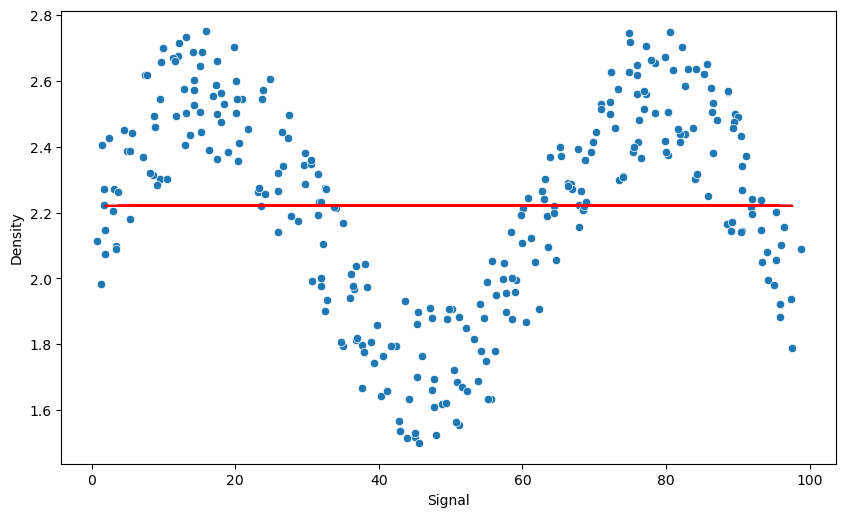

In [30]:
# Plotting out a predictive model
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(data=df, x='Signal', y='Density');

#plotting the testpoints with their preds
plt.plot(X_test, lr_preds,color='red');

#### We can clearly see what is happening here, a Linear Regression model cannot fit to this type of data, which has this type of curvatere/sine curve type of charesteristics.

Though the MAE and RMSE showed us that the performance was quite average the plot and the actual prediction values themselves show us that Linear Regression cannot fit to this type of data.

# 2. Polynomial Regression

In [31]:
# We'll first create a function to create a model for repetitive tasks
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit the model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate the error/metrics
    print('Model Performance:-')
    mae = mean_absolute_error(y_test, predictions)
    print('MAE:- ',mae)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print('RMSE:- ',rmse)
    r2 = r2_score(y_test, predictions)
    print('Model Accuracy',round(r2*100),'%')
    print('\n')
    
    # Plot the model signal range
    plt.figure(figsize=(9,7),dpi=100)
    sns.scatterplot(data=df, x = 'Signal', y= 'Density')
    #plt.plot(X_test, predictions,color='red')
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    plt.plot(signal_range,output,color='red')

In [32]:
# Creating a polynomial pipeline:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

#### Pipeline is a simple concept that helps us to run th esteps we want

In [33]:
3# Using pipeline to create a Polynomial regression
pipe = make_pipeline(PolynomialFeatures(degree=7),LinearRegression())

We saw this just done in two steps earlier, but this has it all in one easy to use model.

This pipe is now going to act like a model which can directly run inside our run_model function.

Model Performance:-
MAE:-  0.11883830992624961
RMSE:-  0.1361959182994399
Model Accuracy 71 %




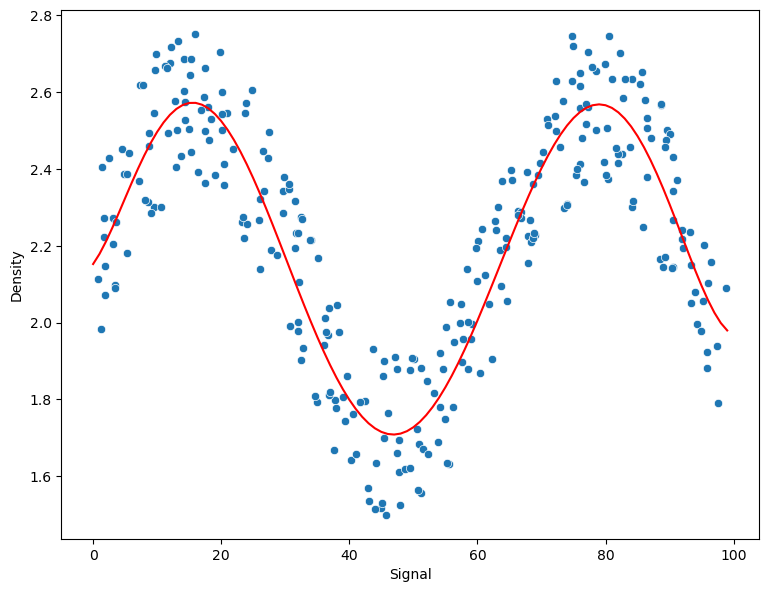

In [34]:
run_model(pipe,X_train,y_train,X_test,y_test)

We can see a second degree polynomial curve.

So notice that as we get to more and more extreme degrees, I will end up getting or picking up more and more noise.

And for this sort of data set, if we knew my signal was always going to be between zero and one hundred, we could probably find some polynomial order that was able to balance this out.

##### So in this case it looks like degree 6 fits perfectly, So in general, if we knew that our signal was always going to be between 0 and 100  what we have used to plot also, we could be satisfied with degree six. But what if you want to expand this to a signal range beyond 100, but you don't have any data points for that and you don't know what to expect or how well this is going to fit.

##### That's where you probably want to go to a more robust model, something like K nearest neighbors, regression or decision, tree regression, support, vector regression, etc..

# 3.KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor

Model Performance:-
MAE:-  0.11877297474442382
RMSE:-  0.15234870286353372
Model Accuracy 64 %


Model Performance:-
MAE:-  0.12198383614100564
RMSE:-  0.13730685016923655
Model Accuracy 70 %


Model Performance:-
MAE:-  0.11635971693292672
RMSE:-  0.13277855732740926
Model Accuracy 72 %


Model Performance:-
MAE:-  0.1207030971917154
RMSE:-  0.13974991273788953
Model Accuracy 69 %




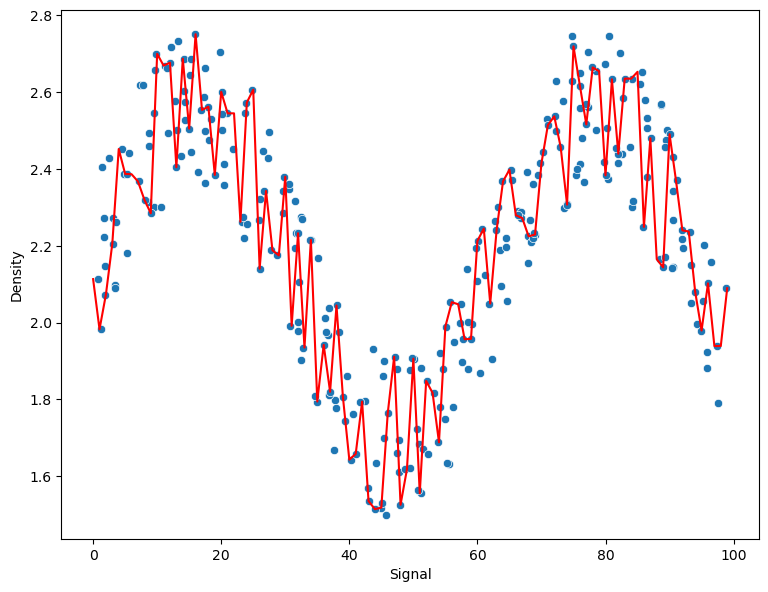

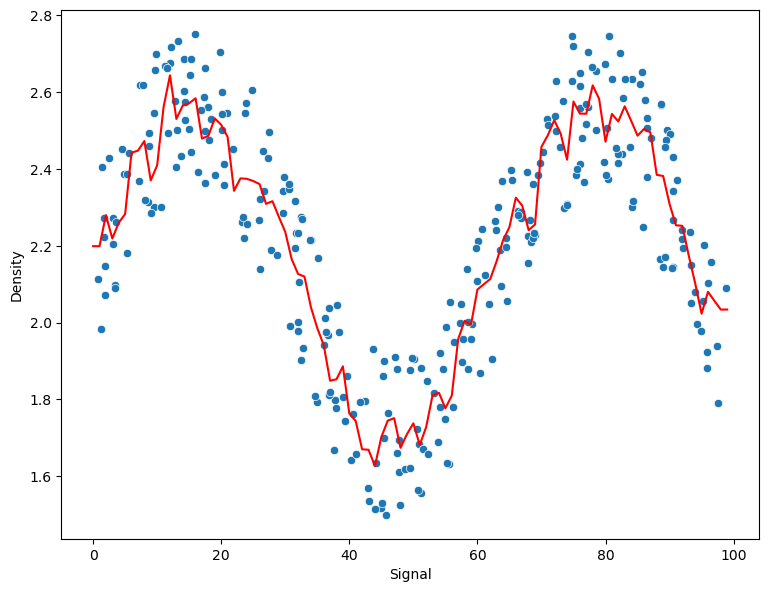

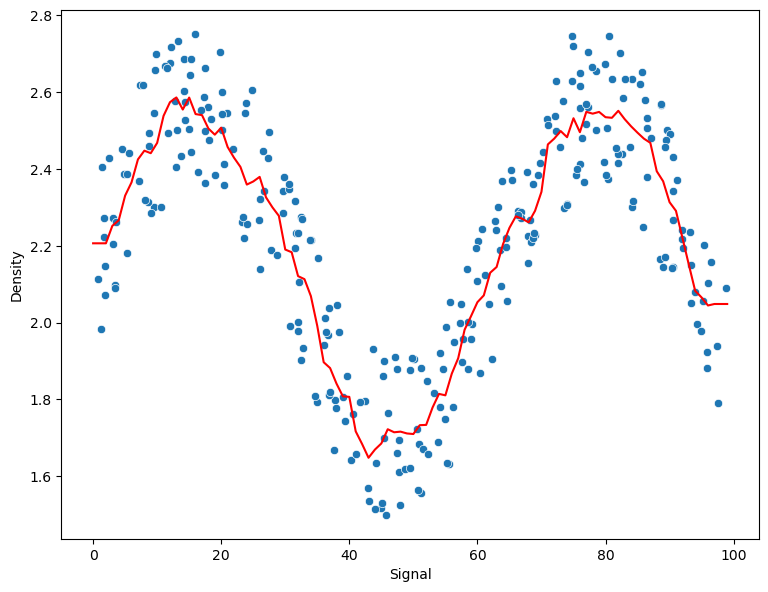

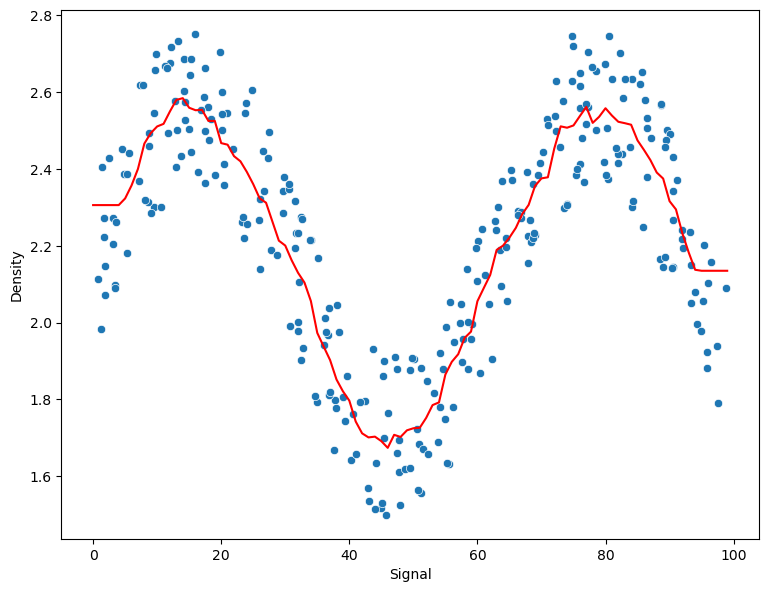

In [36]:
# We can set a for loop to test out the best K value
k_values = [1,5,10,20]
for n in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=n)
    
    # use the run_mode function to buildout the model
    run_model(knn_model, X_train,y_train,X_test,y_test)

So we can the the order of results are k=1,5,10

We can see that in first model with k=1, the model ends up picking alot of noise, trying to fit to all the points, but as we begin to average out to a higher value of K we introduce more bias, thereby reducing the variance.

As we increase the K value we can see it is not not fitting to as muchnoise/data points in the model and we get that estimating curve to be slightly better.

But incase of adding a very high value like 20 we can see it is adding too much bias and it is also expected from KNN as it works just like that.

# 4. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
DT_model = DecisionTreeRegressor()

Since we have only one feature we are not going to change the value of the hyperparameters, we will use the default values.

Model Performance:-
MAE:-  0.11877297474442382
RMSE:-  0.15234870286353372
Model Accuracy 64 %




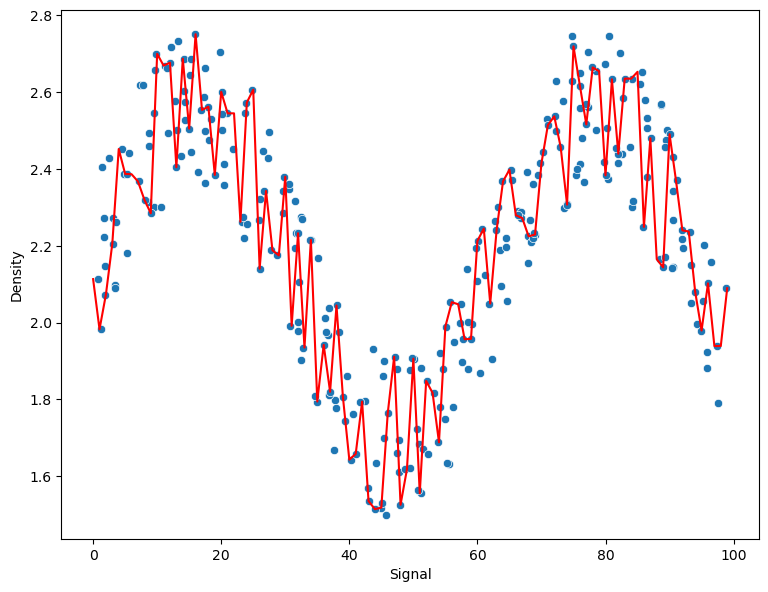

In [39]:
run_model(DT_model, X_train,y_train,X_test,y_test)

Here we kinda see the same behaviour that a single decision tree will have. Very noisy, fitting to much to the data and this is kinda similar to the having a very small K value in KNN as we saw.

# 5. SVM

For SVM we need to have a C value and a gamma value, so we will need to use a gridsearch for this.

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [41]:
svr_model = SVR()
parameter_grid = [{'C':[0.01,0.1,1,5,10,100,500,1000], 'gamma':['auto', 'scale']}]

In [42]:
grid_model = GridSearchCV(estimator=svr_model, param_grid=parameter_grid)

Model Performance:-
MAE:-  0.1090770125151701
RMSE:-  0.12685957911518206
Model Accuracy 75 %




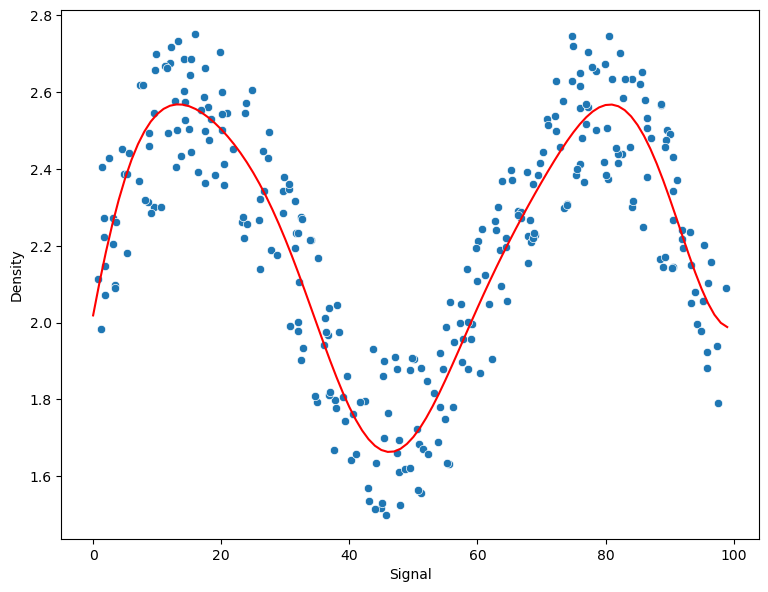

In [43]:
run_model(grid_model, X_train,y_train,X_test,y_test)

So in SVR we can see that the behaviour is kinda interesting, as it is tryng to keep the margin such that it best fits that curve.

So this is where in SVR we can go and again change up the values of hyperparameters to get a best fit.

But overall we can say that the model is performing quite well, but not as smooth as what we saw in Polynomial regression, but also we can see from the plot that it is trying its best to have low variance in the model.

# 6. Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

Since we have only one feature we are not going to change the value of the hyperparameters, we will use the default values.

We can play around with the no. of estimators value, but it won't make a huge difference as we are dealing with only 1 feature. We can try like 10 vs 20 vs 100  no of trees and we wont see a big change, as we only have 1 feature.

In [45]:
rfr_model = RandomForestRegressor(n_estimators=10)

Model Performance:-
MAE:-  0.1065578028519445
RMSE:-  0.12922801867029607
Model Accuracy 74 %




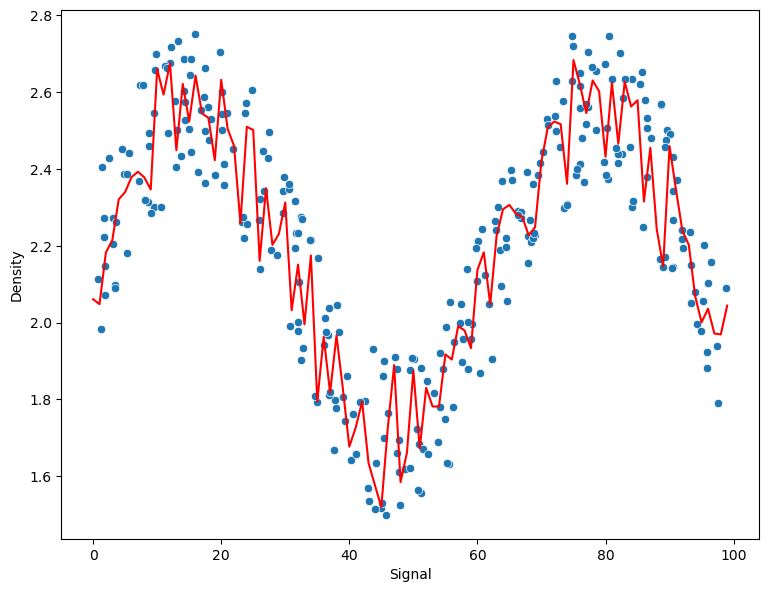

In [50]:
run_model(rfr_model,X_train,y_train,X_test,y_test)

We can see that it's picking up too much noise from the data.

So its quite interesting to see that it is both able to fit to that noise and also have enough bias that is fitting to the general curve.

##### And depending on the situation we can decide, like how many features we have we can compare the tet metrics for that each model gives to something like polynomial regression to decide if it was worthit to switch to something like Random Forest Regressor or sticking to the polynomial was better.

# 7. Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
gb_model = GradientBoostingRegressor()

Model Performance:-
MAE:-  0.11318284854800689
RMSE:-  0.13294148649584667
Model Accuracy 72 %




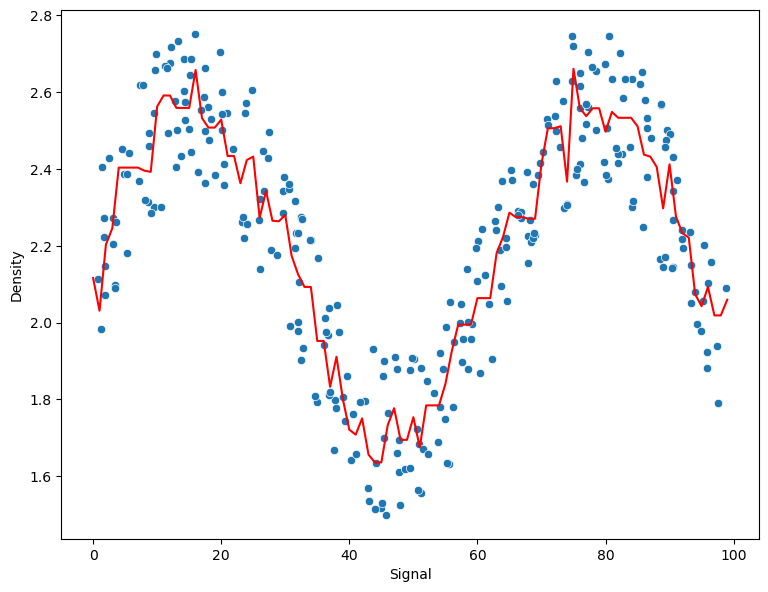

In [52]:
run_model(gb_model,X_train,y_train,X_test,y_test)

Overall we can see gradient boosting too fits quite well to the data, this one in particular though is not picking as much noise from the data as much as Random Forest, which means there is a lot of potential in performinh a good Boosting algo.

# 8 Ada Boost

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
adab_model = AdaBoostRegressor()

Model Performance:-
MAE:-  0.11420820895940866
RMSE:-  0.1341455552964336
Model Accuracy 72 %




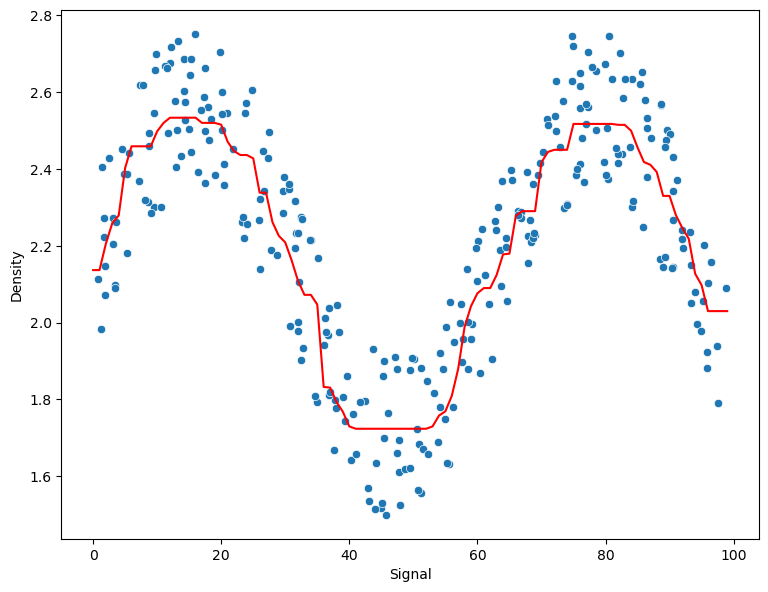

In [55]:
run_model(adab_model,X_train,y_train,X_test,y_test)

And you can see a similar behavior here where we're starting to pick up that general curvature and notice it's not picking up as much of these high points or these low points.

#### And again on depending on the situation we can decide, like how many features we have we can compare the test metrics that each model gives to decide if it was worth it to switch to different models and ro decide which model to use finally.